<a href="https://colab.research.google.com/github/albin2122/Video-game-sales-Analysis/blob/main/Task1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## **Task 1**    -  **Data Analysis and Insights Generation**



## 1. Obtain a real-world dataset related to a specific domain (e.g., sales, marketing, customer behavior).

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
vgsales_df=pd.read_csv('/content/drive/MyDrive/MYM/Task 1/vgsales.csv')

## ***1. Know Your Data***

In [ ]:
vgsales_df.head()

,Rank,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales
0,1,Wii Sports,Wii,2006.0,Sports,Nintendo,41.49,29.02,3.77,8.46,82.74
1,2,Super Mario Bros.,NES,1985.0,Platform,Nintendo,29.08,3.58,6.81,0.77,40.24
2,3,Mario Kart Wii,Wii,2008.0,Racing,Nintendo,15.85,12.88,3.79,3.31,35.82
3,4,Wii Sports Resort,Wii,2009.0,Sports,Nintendo,15.75,11.01,3.28,2.96,33.00
4,5,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,Nintendo,11.27,8.89,10.22,1.00,31.37


In [ ]:
vgsales_df.shape

(16598, 11)

In [ ]:
vgsales_df.isnull().sum()

Rank              0
Name              0
Platform          0
Year            271
Genre             0
Publisher        58
NA_Sales          0
EU_Sales          0
JP_Sales          0
Other_Sales       0
Global_Sales      0
dtype: int64

There are some null values in columns  year and publisher 

In [ ]:
# Dataset Info
vgsales_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16598 entries, 0 to 16597
Data columns (total 11 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Rank          16598 non-null  int64  
 1   Name          16598 non-null  object 
 2   Platform      16598 non-null  object 
 3   Year          16327 non-null  float64
 4   Genre         16598 non-null  object 
 5   Publisher     16540 non-null  object 
 6   NA_Sales      16598 non-null  float64
 7   EU_Sales      16598 non-null  float64
 8   JP_Sales      16598 non-null  float64
 9   Other_Sales   16598 non-null  float64
 10  Global_Sales  16598 non-null  float64
dtypes: float64(6), int64(1), object(4)
memory usage: 1.4+ MB


Colum name, platform, genre and publisher are of object datatype, rest are all numeric datatype.

In [ ]:
# Dataset Duplicate Value Count
len(vgsales_df[vgsales_df.duplicated()])

0

There isnt any duplicate values as well

**Variable decription:**

Rank - Ranking of overall sales

Name - The games name

Platform - Platform of the games release (i.e. PC,PS4, etc.)

Year - Year of the game's release

Genre - Genre of the game

Publisher - Publisher of the game

NA_Sales - Sales in North America (in millions)

EU_Sales - Sales in Europe (in millions)

JP_Sales - Sales in Japan (in millions)

Other_Sales - Sales in the rest of the world (in millions)

Global_Sales - Total worldwide sales.

## 2.Exploratory data analysis

### Chart 1- Genre distribution

In [ ]:
vgsales_df.head(2)

,Rank,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales
0,1,Wii Sports,Wii,2006.0,Sports,Nintendo,41.49,29.02,3.77,8.46,82.74
1,2,Super Mario Bros.,NES,1985.0,Platform,Nintendo,29.08,3.58,6.81,0.77,40.24


In [ ]:
vgsales_df['Genre'].value_counts()

Action          3316
Sports          2346
Misc            1739
Role-Playing    1488
Shooter         1310
Adventure       1286
Racing          1249
Platform         886
Simulation       867
Fighting         848
Strategy         681
Puzzle           582
Name: Genre, dtype: int64

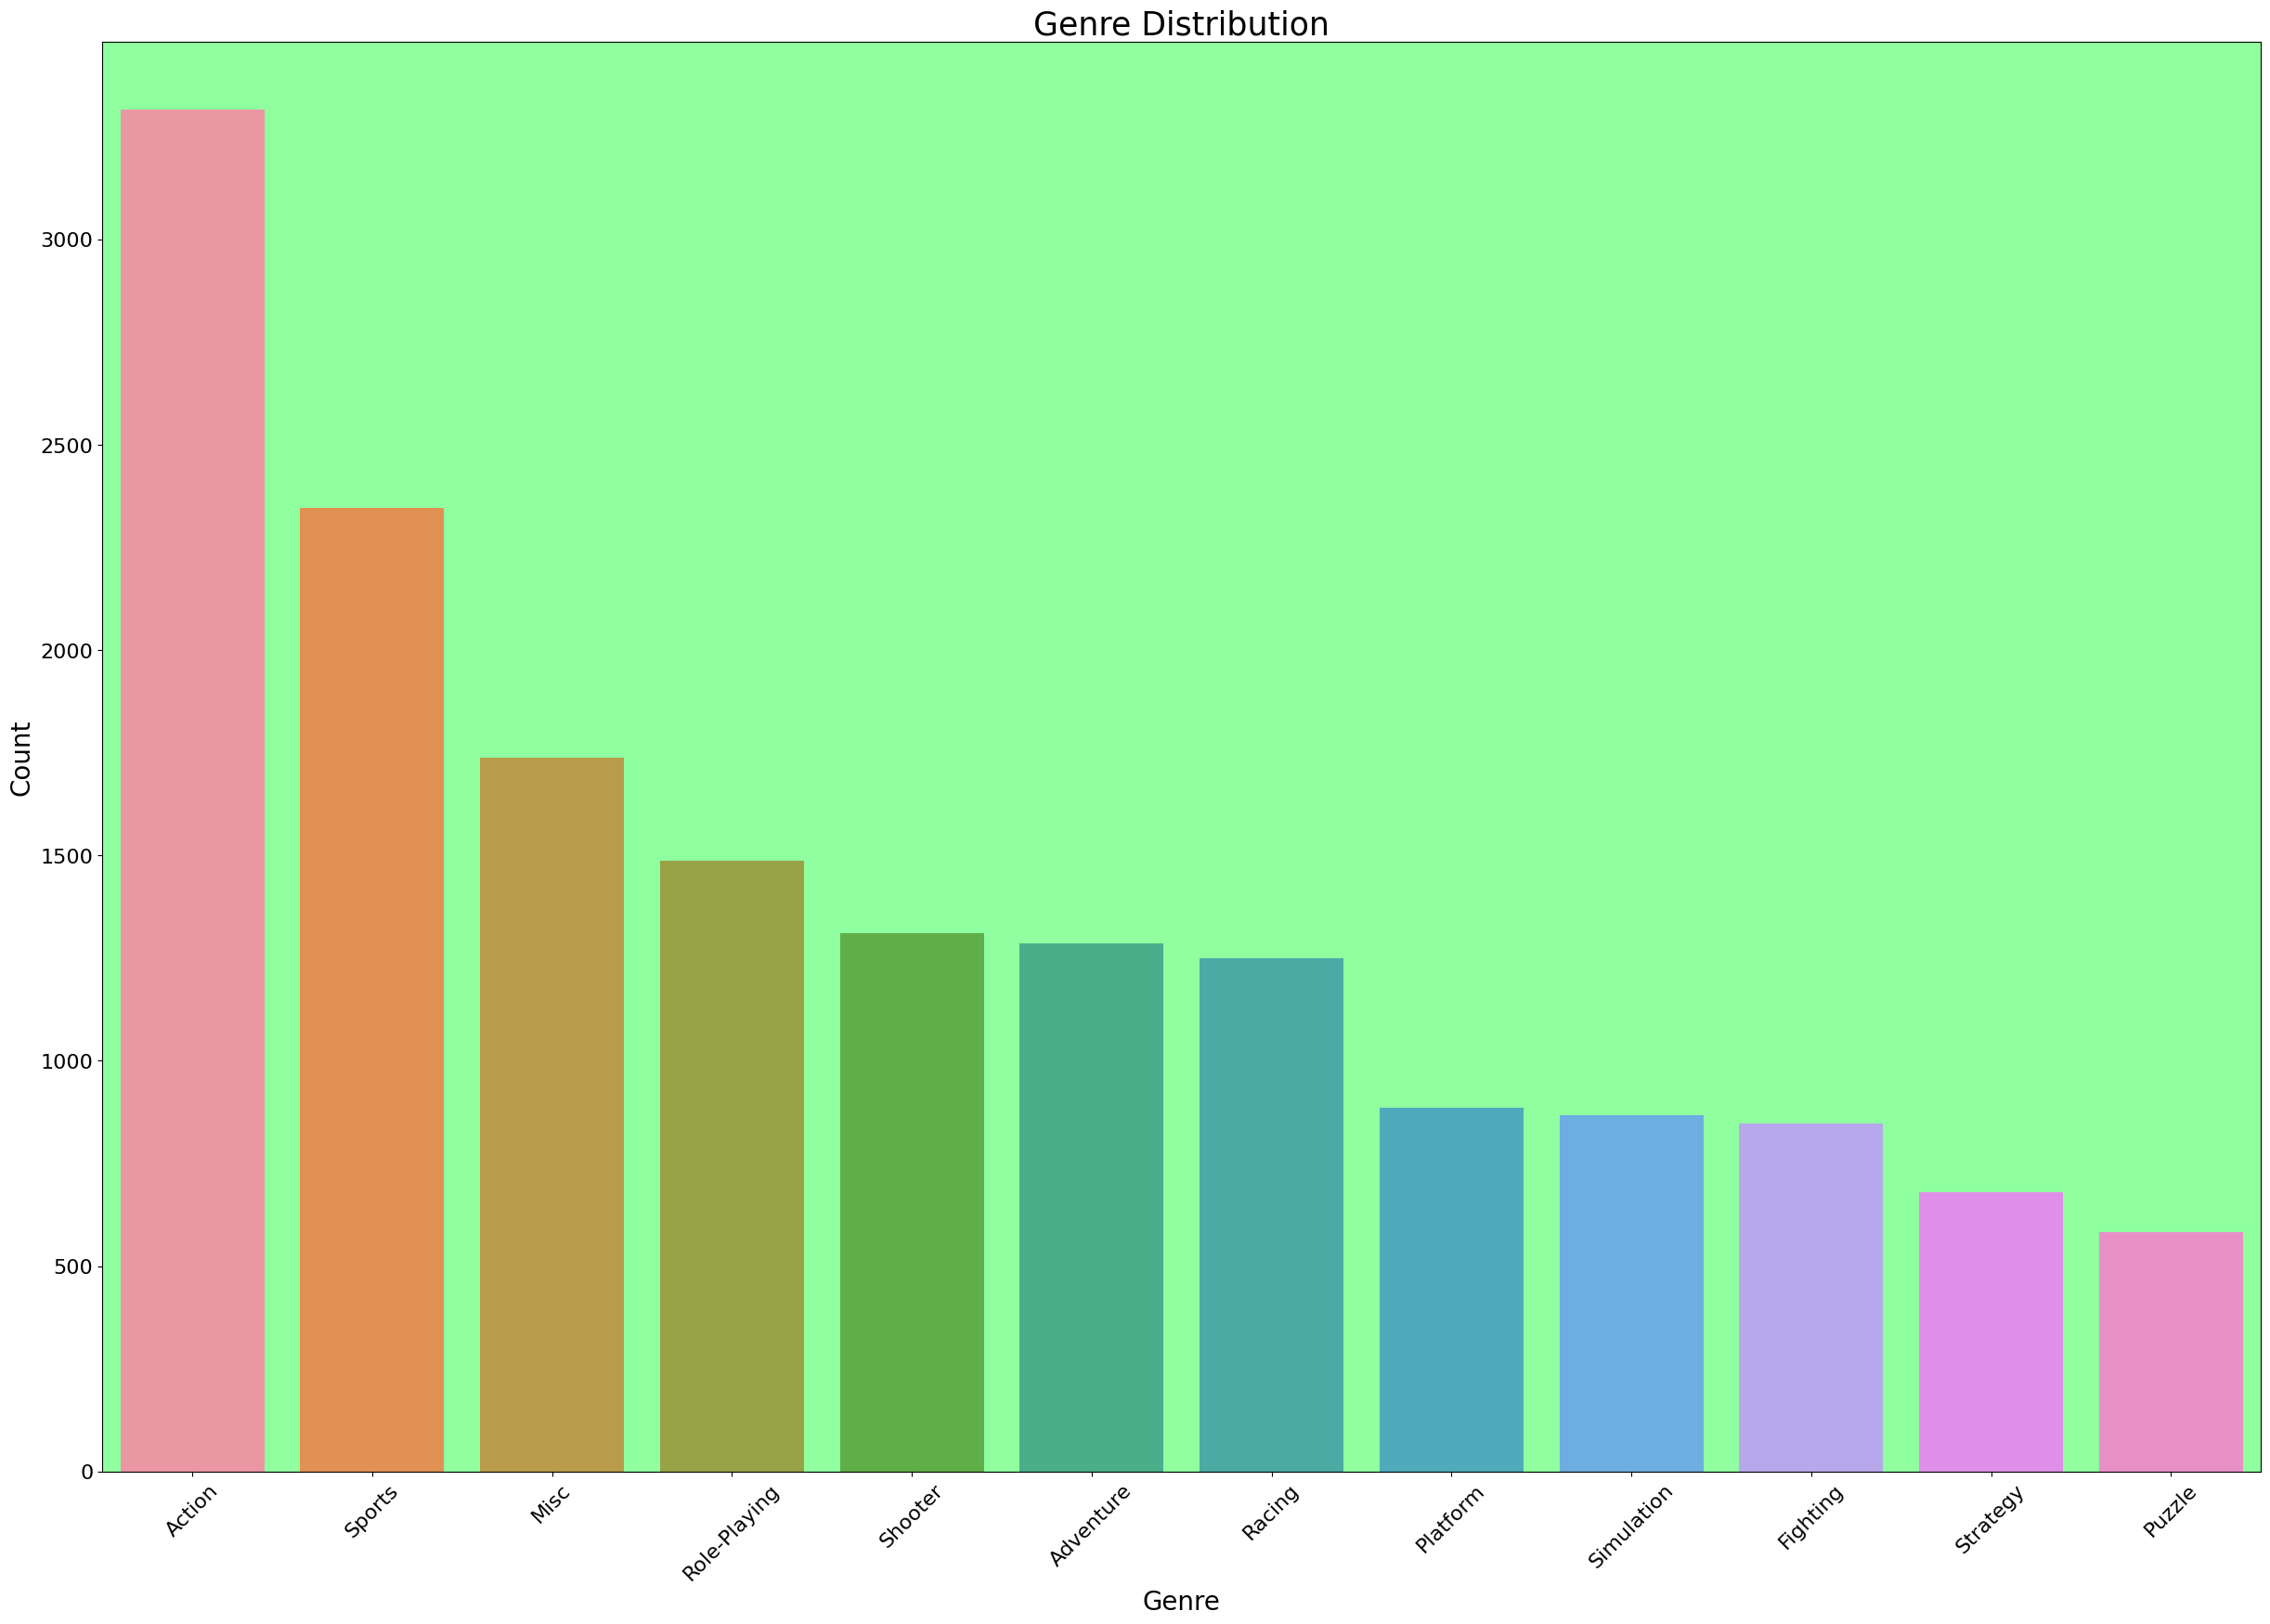

In [ ]:
plt.figure(facecolor = "white",figsize=(30, 20))
plt.xticks(size = 16, rotation=45)
plt.yticks(size = 16)
ax= sns.countplot(x="Genre", data=vgsales_df, order=vgsales_df.Genre.value_counts().index)
ax.set_xlabel('Genre', fontsize=20)
ax.set_ylabel('Count', fontsize=20)
ax.set_title('Genre Distribution', fontsize=25)
ax.set_facecolor("xkcd:mint green")
plt.show()

* The  genre  action is highly distrubuted compared to others
* So it is always better develop video games on Action since it has the market demand 



### Chart -2 - Genre through different regions

In [ ]:
vgsales_df.head()

,Rank,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales
0,1,Wii Sports,Wii,2006.0,Sports,Nintendo,41.49,29.02,3.77,8.46,82.74
1,2,Super Mario Bros.,NES,1985.0,Platform,Nintendo,29.08,3.58,6.81,0.77,40.24
2,3,Mario Kart Wii,Wii,2008.0,Racing,Nintendo,15.85,12.88,3.79,3.31,35.82
3,4,Wii Sports Resort,Wii,2009.0,Sports,Nintendo,15.75,11.01,3.28,2.96,33.00
4,5,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,Nintendo,11.27,8.89,10.22,1.00,31.37


In [ ]:
# Let's select genres and regions
regions = vgsales_df[['Genre', 'NA_Sales', 'EU_Sales', 'JP_Sales', 'Other_Sales']]

region_genre = regions.groupby(by=['Genre']).sum().reset_index()

In [ ]:
df_melt = pd.melt(region_genre.reset_index(), id_vars=['Genre'], value_vars=['NA_Sales', 'EU_Sales', 'JP_Sales', 'Other_Sales'], 
                  var_name='Sale_Area', value_name='Sale_Price')

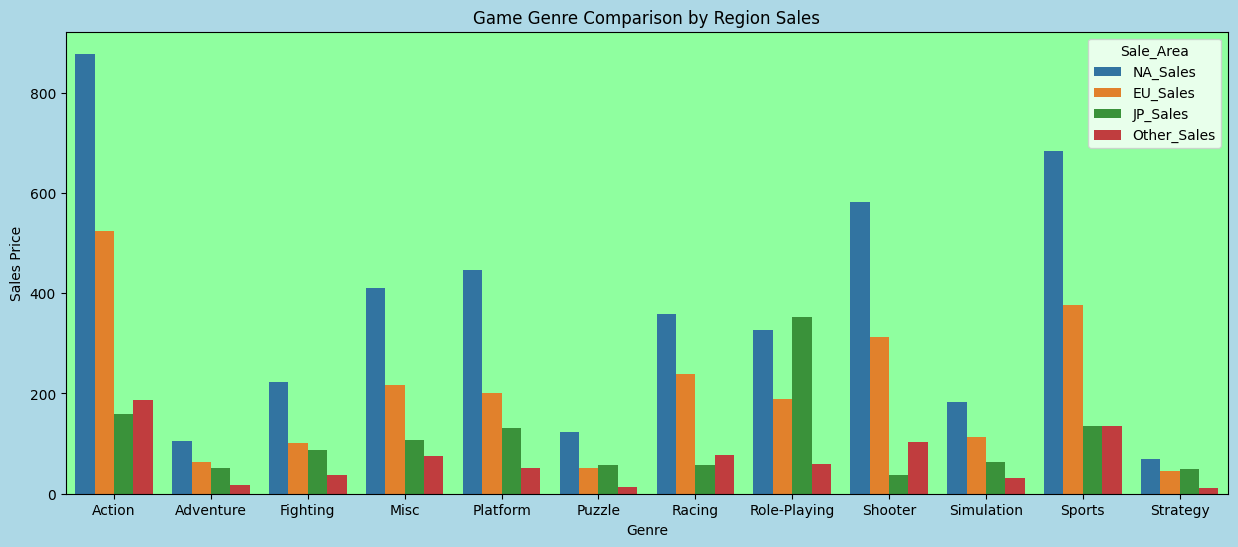

In [ ]:
plt.figure(facecolor = "lightblue",figsize = (15, 6))
ax = sns.barplot(x='Genre', y='Sale_Price', hue='Sale_Area', data = df_melt)
ax.set(xlabel='Genre',ylabel='Sales Price', title='Game Genre Comparison by Region Sales')
ax.set_facecolor("xkcd:mint green")

plt.show()

* North America region has the highest number of sales
* Then comes Europe


##### 2. What is/are the insight(s) found from the chart?

Most of the Video games are produced and used in North American regions
* High demand for action video games in North America


### chart-3 -Publishers

In [ ]:
vgsales_df['Publisher'].value_counts().head(10)

Electronic Arts                 1351
Activision                       975
Namco Bandai Games               932
Ubisoft                          921
Konami Digital Entertainment     832
THQ                              715
Nintendo                         703
Sony Computer Entertainment      683
Sega                             639
Take-Two Interactive             413
Name: Publisher, dtype: int64

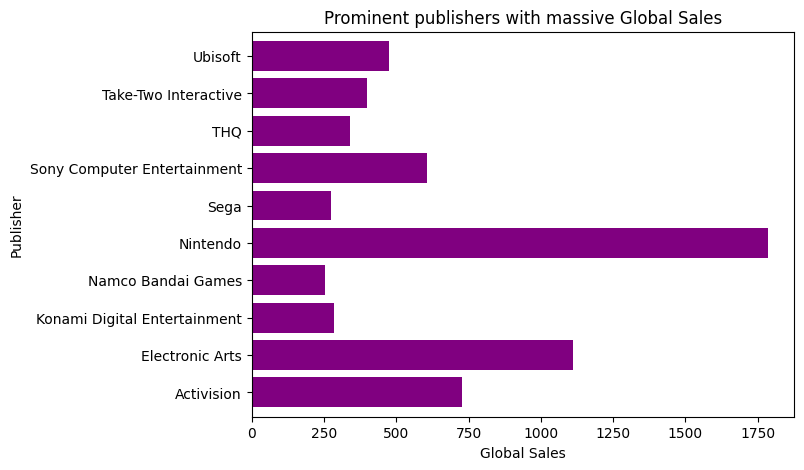

In [ ]:
fig, ax = plt.subplots(figsize = (7,5))
prominent_players = vgsales_df.groupby('Publisher').Global_Sales.sum()
prominent_players = prominent_players[prominent_players > 250]

prominent_players.plot(kind='barh', color='purple', width=0.8, figsize=(7, 5))
plt.title('Prominent publishers with massive Global Sales')
plt.xlabel('Global Sales')
plt.ylabel('Publisher')
plt.show()


In [ ]:
vgsales_df.head()

,Rank,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales
0,1,Wii Sports,Wii,2006.0,Sports,Nintendo,41.49,29.02,3.77,8.46,82.74
1,2,Super Mario Bros.,NES,1985.0,Platform,Nintendo,29.08,3.58,6.81,0.77,40.24
2,3,Mario Kart Wii,Wii,2008.0,Racing,Nintendo,15.85,12.88,3.79,3.31,35.82
3,4,Wii Sports Resort,Wii,2009.0,Sports,Nintendo,15.75,11.01,3.28,2.96,33.00
4,5,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,Nintendo,11.27,8.89,10.22,1.00,31.37


##### 2. What is/are the insight(s) found from the chart?

Nintendo is the prominent publisher.They are producing variety of games ranging from sports to roleplaying.
* If you are investor it is highly likable to invest in a company that produce different trype of games and is the prominent publisher


## Chart - 4 -Platform

In [ ]:
vgsales_df['Platform'].value_counts()

DS      2163
PS2     2161
PS3     1329
Wii     1325
X360    1265
PSP     1213
PS      1196
PC       960
XB       824
GBA      822
GC       556
3DS      509
PSV      413
PS4      336
N64      319
SNES     239
XOne     213
SAT      173
WiiU     143
2600     133
NES       98
GB        98
DC        52
GEN       27
NG        12
SCD        6
WS         6
3DO        3
TG16       2
GG         1
PCFX       1
Name: Platform, dtype: int64

<Axes: >

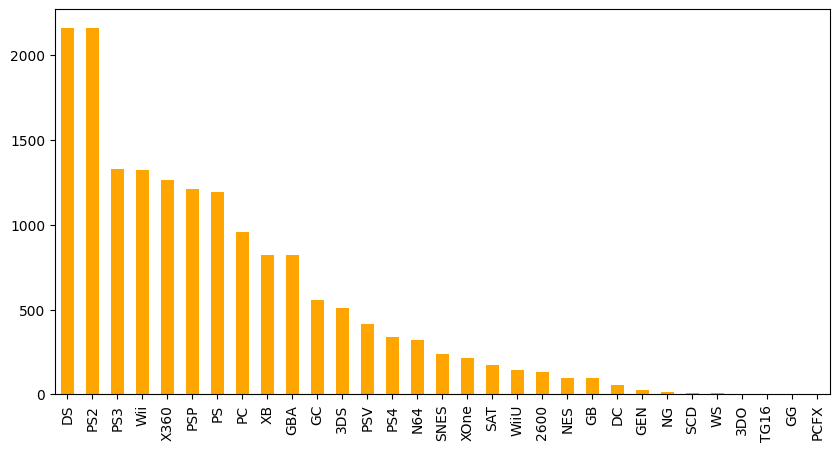

In [ ]:
plt.figure(figsize=(10,5))
vgsales_df['Platform'].value_counts().plot(kind='bar',color=['orange'])

##### 2. What is/are the insight(s) found from the chart?

* Top 5 platforms that people are using for playing games is DS,PS2, PS3,Wii and X360. 
* There isnt much user difference between DS and PS2
* As the latest version of PS2 coming up, It is to assume that people will try to change from PS2 to PS3.


## Chart- 5- platform vs sum of sales

Text(0.5, 1.0, 'Sum of sales')

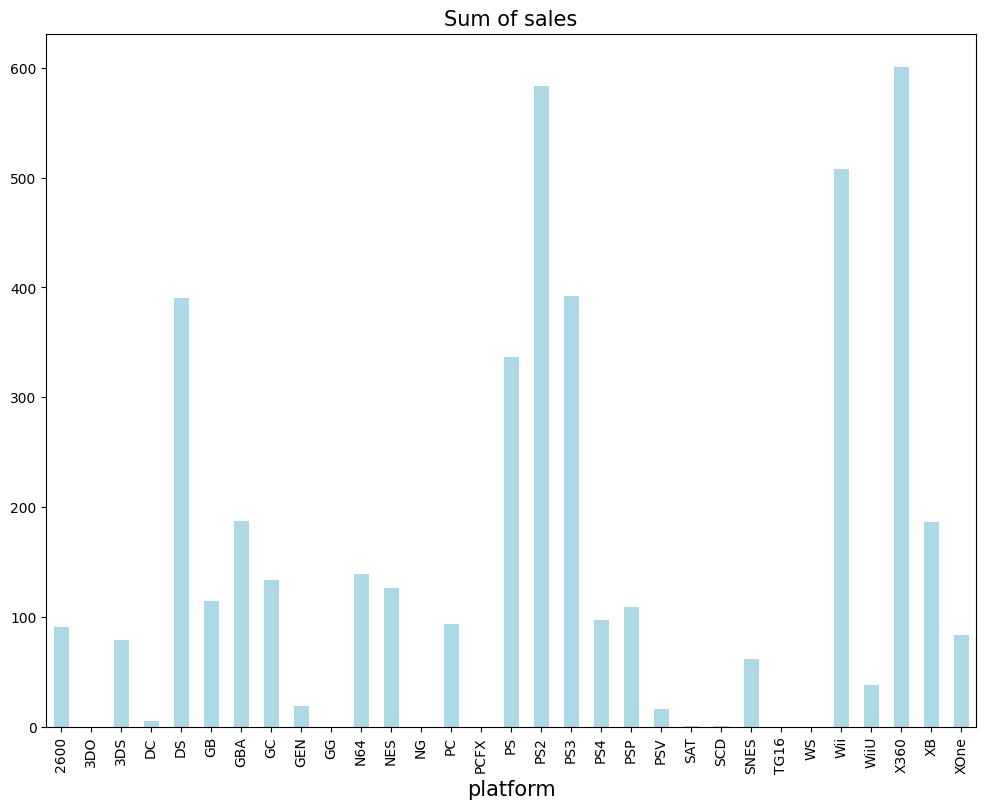

In [ ]:
plt.figure(figsize=(12,9),dpi=100)
vgsales_df.groupby('Platform')['NA_Sales'].sum().plot(kind='bar',color=['lightblue'])
plt.title('Sum of Na_sales per platform',size=15)
plt.xlabel('platform',size=15)
plt.title('Sum of sales',size=15)

##### 2. What is/are the insight(s) found from the chart?

* X360 and PS2 tops the list


## Chart -6 - Video game release by year

[Text(0, 0, '9'),
 Text(0, 0, '46'),
 Text(0, 0, '36'),
 Text(0, 0, '17'),
 Text(0, 0, '14'),
 Text(0, 0, '14'),
 Text(0, 0, '21'),
 Text(0, 0, '16'),
 Text(0, 0, '15'),
 Text(0, 0, '17'),
 Text(0, 0, '16'),
 Text(0, 0, '41'),
 Text(0, 0, '43'),
 Text(0, 0, '60'),
 Text(0, 0, '121'),
 Text(0, 0, '219'),
 Text(0, 0, '263'),
 Text(0, 0, '289'),
 Text(0, 0, '379'),
 Text(0, 0, '338'),
 Text(0, 0, '349'),
 Text(0, 0, '482'),
 Text(0, 0, '829'),
 Text(0, 0, '775'),
 Text(0, 0, '763'),
 Text(0, 0, '941'),
 Text(0, 0, '1008'),
 Text(0, 0, '1202'),
 Text(0, 0, '1428'),
 Text(0, 0, '1431'),
 Text(0, 0, '1259'),
 Text(0, 0, '1139'),
 Text(0, 0, '657'),
 Text(0, 0, '546'),
 Text(0, 0, '582'),
 Text(0, 0, '614'),
 Text(0, 0, '344'),
 Text(0, 0, '3'),
 Text(0, 0, '1')]

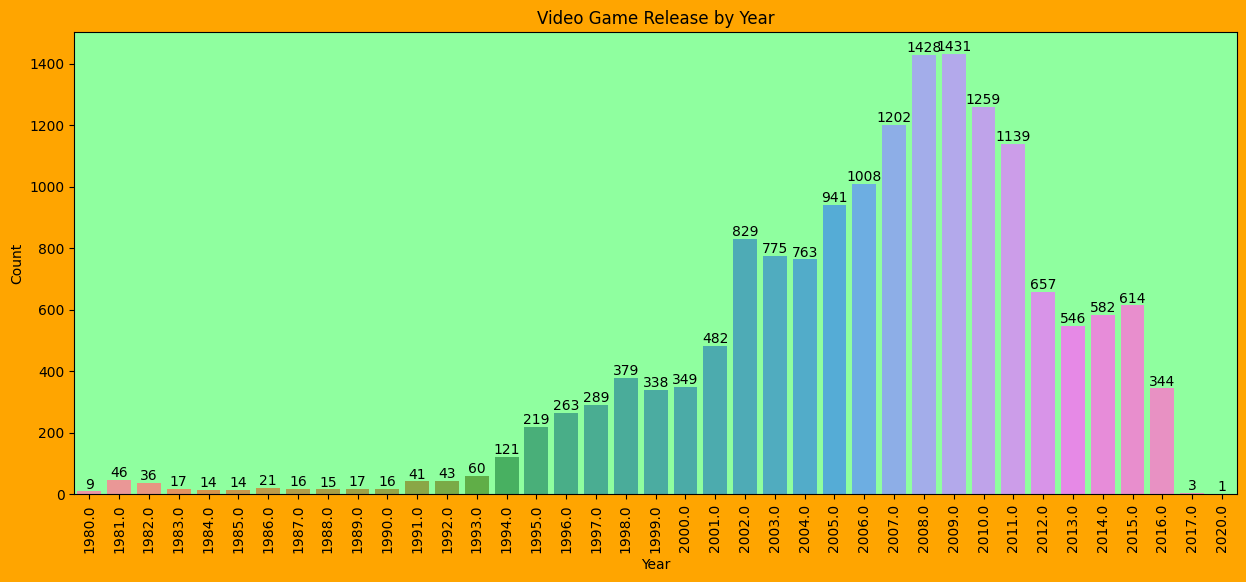

In [ ]:
plt.figure(facecolor = "orange",figsize = (15, 6))
plt.xticks(rotation=90)
ax= sns.barplot(x = vgsales_df.Year.value_counts().index, y = vgsales_df.Year.value_counts().values)
ax.set(xlabel='Year',ylabel='Count', title='Video Game Release by Year')
ax.set_facecolor("xkcd:mint green")
ax.bar_label(ax.containers[0])

##### 2. What is/are the insight(s) found from the chart?

* The year most number of video games released is 2009 and then 2008
* There is decreasing trend in number of games produced every year after 2009


### Chart -7 -Total sales of region

In [ ]:
sales = ['NA_Sales','EU_Sales', 'JP_Sales', 'Other_Sales']
total_sales = []
for i in sales:
    x = vgsales_df[i].sum()
    total_sales.append(x)

In [ ]:
df_sales = pd.DataFrame({"Total_sales": total_sales}, index=sales)
df_sales

,Total_sales
NA_Sales,4392.95
EU_Sales,2434.13
JP_Sales,1291.02
Other_Sales,797.75


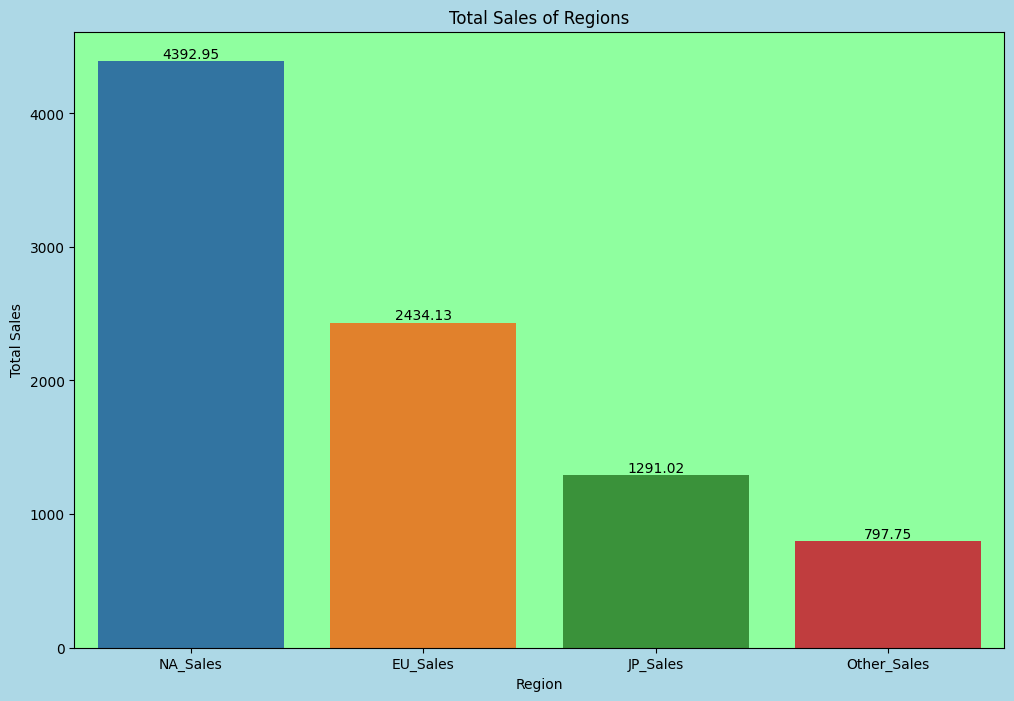

In [ ]:
plt.figure(facecolor = "lightblue",figsize = (12, 8))
ax = sns.barplot(x=df_sales.index, y='Total_sales', data = df_sales)
ax.set(xlabel='Region',ylabel='Total Sales', title='Total Sales of Regions')
ax.set_facecolor("xkcd:mint green")
ax.bar_label(ax.containers[0])
plt.show()

In [ ]:
vgsales_df.head()

,Rank,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales
0,1,Wii Sports,Wii,2006.0,Sports,Nintendo,41.49,29.02,3.77,8.46,82.74
1,2,Super Mario Bros.,NES,1985.0,Platform,Nintendo,29.08,3.58,6.81,0.77,40.24
2,3,Mario Kart Wii,Wii,2008.0,Racing,Nintendo,15.85,12.88,3.79,3.31,35.82
3,4,Wii Sports Resort,Wii,2009.0,Sports,Nintendo,15.75,11.01,3.28,2.96,33.00
4,5,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,Nintendo,11.27,8.89,10.22,1.00,31.37


##### 2. What is/are the insight(s) found from the chart?

* North America is the biggest market
* Europe comes second
* A country having much less population generating 1291 total sales- japan


### Chart - 8- Genre vise game sales

In [ ]:
import plotly.graph_objects as go

sales_by_genre = vgsales_df.groupby('Genre').sum()[['NA_Sales', 'EU_Sales', 'JP_Sales', 'Other_Sales']]

colors = ['rgb(244,109,67)', 'rgb(254,224,144)', 'rgb(85, 194, 110)', 'rgb(96, 156, 235)']

fig = go.Figure()

for i, region in enumerate(['NA_Sales', 'EU_Sales', 'JP_Sales', 'Other_Sales']):
  fig.add_trace(go.Bar(x=sales_by_genre[region],y=sales_by_genre.index,name=region,orientation='h',marker=dict(color=colors[i])))
  fig.update_layout(barmode='stack',title='Genre Wise Game Sales by Region',xaxis=dict(title='Sales in $M'),yaxis=dict(title='Genre'),paper_bgcolor='beige',plot_bgcolor='beige')

fig.show()






<ipython-input-26-b79bd0ccbe42>:3: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  sales_by_genre = vgsales_df.groupby('Genre').sum()[['NA_Sales', 'EU_Sales', 'JP_Sales', 'Other_Sales']]


##### 2. What is/are the insight(s) found from the chart?

* Genre wise game sales by region



### Chart -9 -Heatmap

<ipython-input-27-a1baa1cf9ed7>:1: FutureWarning:

The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.



<Axes: >

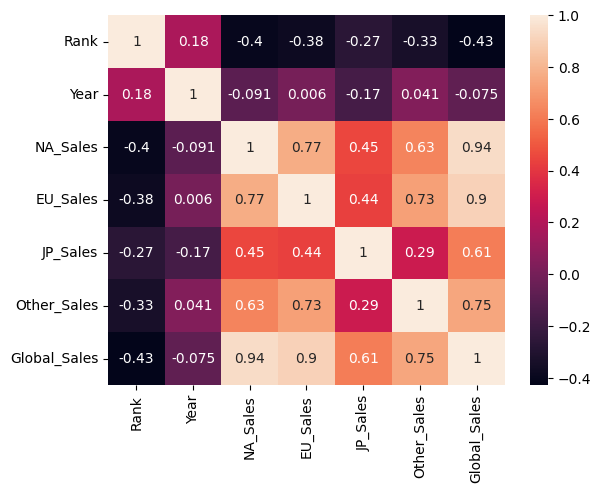

In [ ]:
sns.heatmap(vgsales_df.corr(),annot=True)

##### 2. What is/are the insight(s) found from the chart?

* There is a high correlation between North America and Europe.


## chart -10- Time series analysis

In [ ]:
vgcopy=vgsales_df.copy()

In [ ]:
vgcopy.head(2)

,Rank,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales,year_block
0,1,Wii Sports,Wii,2006.0,Sports,Nintendo,41.49,29.02,3.77,8.46,82.74,"(2005, 2010]"
1,2,Super Mario Bros.,NES,1985.0,Platform,Nintendo,29.08,3.58,6.81,0.77,40.24,"(1980, 2000]"


In [ ]:
new=vgsales_df.groupby(by='Year')['Global_Sales'].sum().reset_index()

In [ ]:
new

,Year,Global_Sales
0,1980.0,11.38
1,1981.0,35.77
2,1982.0,28.86
3,1983.0,16.79
4,1984.0,50.36
5,1985.0,53.94
6,1986.0,37.07
7,1987.0,21.74
8,1988.0,47.22
9,1989.0,73.45


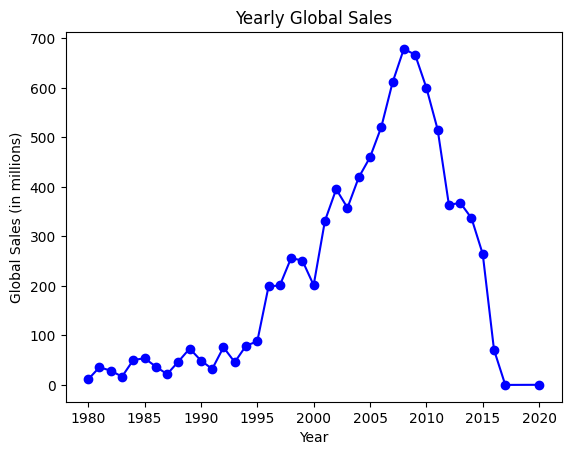

In [ ]:
# Plotting the line plot

plt.plot(new['Year'], new['Global_Sales'], marker='o', linestyle='-', color='b')

# Adding labels and title
plt.xlabel('Year')
plt.ylabel('Global Sales (in millions)')
plt.title('Yearly Global Sales')

# Display the plot
plt.show()

## Clean and preprocess the data, handling missing values, outliers, and inconsistent formats

In [ ]:
vgsales_df.head()

,Rank,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales
0,1,Wii Sports,Wii,2006.0,Sports,Nintendo,41.49,29.02,3.77,8.46,82.74
1,2,Super Mario Bros.,NES,1985.0,Platform,Nintendo,29.08,3.58,6.81,0.77,40.24
2,3,Mario Kart Wii,Wii,2008.0,Racing,Nintendo,15.85,12.88,3.79,3.31,35.82
3,4,Wii Sports Resort,Wii,2009.0,Sports,Nintendo,15.75,11.01,3.28,2.96,33.00
4,5,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,Nintendo,11.27,8.89,10.22,1.00,31.37


### Handling missing values

In [ ]:
#handling missing values
vgsales_df.isnull().sum()

Rank              0
Name              0
Platform          0
Year            271
Genre             0
Publisher        58
NA_Sales          0
EU_Sales          0
JP_Sales          0
Other_Sales       0
Global_Sales      0
dtype: int64

Only 2 columns are having null values

In [ ]:
# column year
vgsales_df['Year'].value_counts()

2009.0    1431
2008.0    1428
2010.0    1259
2007.0    1202
2011.0    1139
2006.0    1008
2005.0     941
2002.0     829
2003.0     775
2004.0     763
2012.0     657
2015.0     614
2014.0     582
2013.0     546
2001.0     482
1998.0     379
2000.0     349
2016.0     344
1999.0     338
1997.0     289
1996.0     263
1995.0     219
1994.0     121
1993.0      60
1981.0      46
1992.0      43
1991.0      41
1982.0      36
1986.0      21
1989.0      17
1983.0      17
1990.0      16
1987.0      16
1988.0      15
1985.0      14
1984.0      14
1980.0       9
2017.0       3
2020.0       1
Name: Year, dtype: int64

In [ ]:
#removing those rows with null
vgsales_df = vgsales_df[vgsales_df['Year'].notna()]

In [ ]:
vgsales_df['Year'] = vgsales_df['Year'].astype('int')

<ipython-input-35-a654e904cf39>:1: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



In [ ]:
#publisher column
vgsales_df['Publisher'] = vgsales_df['Publisher'].fillna(value = 'no',axis = 0)

<ipython-input-36-c5acaaf07211>:2: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



Handling Outliers

In [ ]:
vgsales_df.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
Rank,16327.0,8292.868194,4792.669778,1.00,4136.50,8295.00,12441.50,16600.00
Year,16327.0,2006.406443,5.828981,1980.00,2003.00,2007.00,2010.00,2020.00
NA_Sales,16327.0,0.265415,0.821591,0.00,0.00,0.08,0.24,41.49
EU_Sales,16327.0,0.147554,0.508766,0.00,0.00,0.02,0.11,29.02
JP_Sales,16327.0,0.078661,0.311557,0.00,0.00,0.00,0.04,10.22
Other_Sales,16327.0,0.048325,0.189885,0.00,0.00,0.01,0.04,10.57
Global_Sales,16327.0,0.540232,1.565732,0.01,0.06,0.17,0.48,82.74


In [ ]:
vgsales_df['NA_Sales'].max()

41.49

In [ ]:
vgsales_df[vgsales_df['NA_Sales']>1]

,Rank,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales
0,1,Wii Sports,Wii,2006,Sports,Nintendo,41.49,29.02,3.77,8.46,82.74
1,2,Super Mario Bros.,NES,1985,Platform,Nintendo,29.08,3.58,6.81,0.77,40.24
2,3,Mario Kart Wii,Wii,2008,Racing,Nintendo,15.85,12.88,3.79,3.31,35.82
3,4,Wii Sports Resort,Wii,2009,Sports,Nintendo,15.75,11.01,3.28,2.96,33.00
4,5,Pokemon Red/Pokemon Blue,GB,1996,Role-Playing,Nintendo,11.27,8.89,10.22,1.00,31.37
...,...,...,...,...,...,...,...,...,...,...,...
1905,1907,Joust,2600,1982,Platform,Atari,1.01,0.06,0.00,0.01,1.08
1917,1919,NCAA Football 14,X360,2013,Sports,Electronic Arts,1.01,0.00,0.00,0.06,1.07
1953,1955,NFL Blitz,N64,1998,Sports,Midway Games,1.02,0.04,0.00,0.01,1.06
1954,1956,NFL Quarterback Club 98,N64,1997,Sports,Acclaim Entertainment,1.01,0.05,0.00,0.01,1.06


* Mean of NA_sales is just .26 but the maximum value of it is 41.49, we may feel like it is an outlier, but it is not.
* Same in the case of rest attributes

<Axes: >

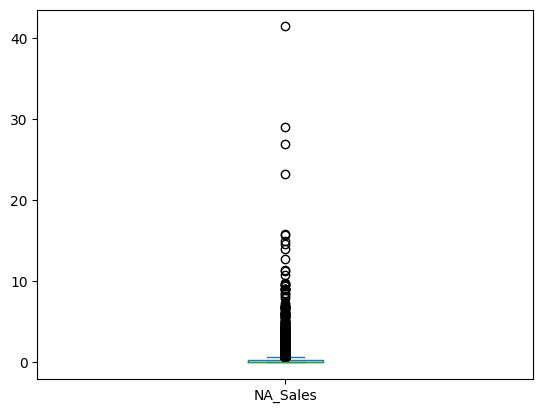

In [ ]:
vgsales_df['NA_Sales'].plot(kind='box')

Inconsistent format


In [ ]:
# Dataset Duplicate Value Count
len(vgsales_df[vgsales_df.duplicated()])

0

There is any duplicate values

## Conduct statistical analysis, applying measures like mean, median, standard deviation, and correlation coefficients.

In [ ]:
vgsales_df.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
Rank,16327.0,8292.868194,4792.669778,1.00,4136.50,8295.00,12441.50,16600.00
Year,16327.0,2006.406443,5.828981,1980.00,2003.00,2007.00,2010.00,2020.00
NA_Sales,16327.0,0.265415,0.821591,0.00,0.00,0.08,0.24,41.49
EU_Sales,16327.0,0.147554,0.508766,0.00,0.00,0.02,0.11,29.02
JP_Sales,16327.0,0.078661,0.311557,0.00,0.00,0.00,0.04,10.22
Other_Sales,16327.0,0.048325,0.189885,0.00,0.00,0.01,0.04,10.57
Global_Sales,16327.0,0.540232,1.565732,0.01,0.06,0.17,0.48,82.74


In [ ]:
vgsales_df['Global_Sales'].mean()

0.5402315183438476

<ipython-input-44-104431bc0dc0>:2: FutureWarning:

The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.



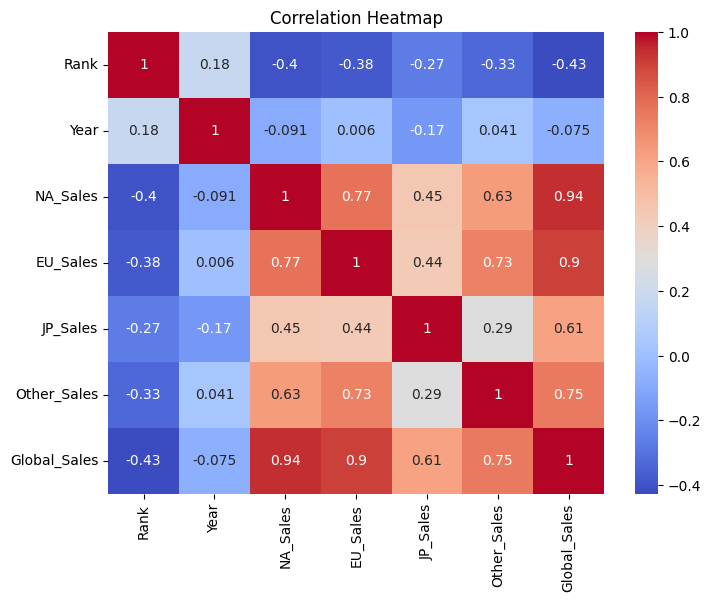

In [ ]:
# Calculate the correlation matrix
corr_matrix = vgsales_df.corr()

# Create a heatmap using Seaborn
plt.figure(figsize=(8, 6))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm')

# Set the title of the heatmap
plt.title('Correlation Heatmap')

# Show the heatmap
plt.show()

## Apply advanced analytical methods (regression analysis, clustering) to identify patterns and trends.


Regression analysis is a statistical technique used to model the relationship between a dependent variable and one or more independent variables. It helps identify patterns, understand the strength and direction of relationships, and make predictions

In [ ]:
vgsales_df.head()

,Rank,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales
0,1,Wii Sports,Wii,2006,Sports,Nintendo,41.49,29.02,3.77,8.46,82.74
1,2,Super Mario Bros.,NES,1985,Platform,Nintendo,29.08,3.58,6.81,0.77,40.24
2,3,Mario Kart Wii,Wii,2008,Racing,Nintendo,15.85,12.88,3.79,3.31,35.82
3,4,Wii Sports Resort,Wii,2009,Sports,Nintendo,15.75,11.01,3.28,2.96,33.00
4,5,Pokemon Red/Pokemon Blue,GB,1996,Role-Playing,Nintendo,11.27,8.89,10.22,1.00,31.37


In [ ]:
# Split the data into independent (X) and dependent (Y) variables
X = vgsales_df.drop(columns=['Name','Platform','Genre','Publisher'])
Y = vgsales_df['Global_Sales']

In [ ]:
# Fit the linear regression model
import statsmodels.api as sm
model = sm.OLS(Y, X)
results = model.fit()

# Print the regression summary
print(results.summary())

                                 OLS Regression Results                                
Dep. Variable:           Global_Sales   R-squared (uncentered):                   1.000
Model:                            OLS   Adj. R-squared (uncentered):              1.000
Method:                 Least Squares   F-statistic:                          1.776e+26
Date:                Thu, 25 May 2023   Prob (F-statistic):                        0.00
Time:                        13:22:30   Log-Likelihood:                      3.9871e+05
No. Observations:               16327   AIC:                                 -7.974e+05
Df Residuals:                   16320   BIC:                                 -7.973e+05
Df Model:                           7                                                  
Covariance Type:            nonrobust                                                  
                   coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------

### Summary

We utilized a comprehensive video game sales dataset that includes information such as game titles, genres, platforms, release dates, and regional sales figures.We conducted detail study on the dataset and come to some conclusions.I am pleased to present to you a concise report summarizing the analysis approach, key findings, and recommendations based on the video game sales data.
1. Analysis Approach:
* Dataset: We utilized a comprehensive video game sales dataset that includes information such as game titles, genres, platforms, release dates, and regional sales figures.
* Data Cleaning: We performed data cleaning tasks to handle missing values, correct inconsistencies, and ensure data integrity.
* Exploratory Data Analysis: We conducted exploratory data analysis to gain insights into the distribution of variables, identify trends, and uncover patterns.

2. Key Findings:
*  Sales by Genre: We examined the sales distribution across different game genres and identified the following key findings:

* The top-selling genres were Action based on overall global sales.
Regional variations: We observed variations in genre preferences across different regions.There isnt much variation , but the genre role playing is famous in japan more than other regions
*  Platform Analysis: We analyzed the sales performance of various gaming platforms and found the following:

* Top-selling platforms: DX,PS2, PS3 accounted for the majority of global sales.
* Emerging platforms: We identified PS3 as potential growth opportunities based on increasing sales trends.
c. Time Analysis: We analyzed the sales trends over time and made the following observations:

* Sales by year: There is an increasing trend can be seen till 2009 and after there is a declining
Seasonal patterns: We observed increasing seasonal trend that can inform marketing and promotional strategies.

3.Recommendations:
* Genre Focus: Based on the sales analysis, we recommend focusing on the top-selling genres to maximize revenue. Allocating resources and marketing efforts towards these genres can yield better returns.
*  Platform Strategy: With the identified emerging platforms, we suggest exploring partnerships or exclusive releases to tap into new market segments and expand the customer base.
*  Time-sensitive Promotions: Leveraging the observed seasonal patterns, we recommend implementing targeted promotional campaigns during peak seasons to drive sales and enhance customer engagement.
* Market Expansion: Based on regional variations, consider tailoring marketing strategies and game localization efforts to cater to the preferences of specific regions, potentially leading to increased sales.


